In [2]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to load
Test_Data = "../data/NFL-PlaybyPlay-2009-2018.csv"

#Read the file 
nfl_data = pd.read_csv(Test_Data)


/Users/i817245/anaconda3/envs/Project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create list of columns to keep
list_KeepCols = ['play_id',
'game_id',
'home_team',
'away_team',
'posteam',
'posteam_type',
'defteam',
'yardline_100',
'game_date',
'quarter_seconds_remaining',
'half_seconds_remaining',
'game_seconds_remaining',
'game_half',
'quarter_end',
'drive',
'sp',
'qtr',
'down',
'goal_to_go',
'time',
'yrdln',
'ydstogo',
'ydsnet',
'desc',
'play_type',
'yards_gained',
'shotgun',
'no_huddle',
'qb_dropback',
'qb_kneel',
'qb_spike',
'qb_scramble',
'pass_length',
'pass_location',
'air_yards',
'yards_after_catch',
'run_location',
'run_gap',
'field_goal_result',
'kick_distance',
'extra_point_result',
'two_point_conv_result',
'home_timeouts_remaining',
'away_timeouts_remaining',
'timeout',
'timeout_team',
'td_team',
'posteam_timeouts_remaining',
'defteam_timeouts_remaining',
'total_home_score',
'total_away_score',
'posteam_score',
'defteam_score',
'score_differential',
'posteam_score_post',
'defteam_score_post',
'score_differential_post',
'punt_blocked',
'first_down_rush',
'first_down_pass',
'first_down_penalty',
'third_down_converted',
'third_down_failed',
'fourth_down_converted',
'fourth_down_failed',
'incomplete_pass',
'interception',
'fumble_forced',
'fumble_not_forced',
'fumble_out_of_bounds',
'safety',
'penalty',
'tackled_for_loss',
'fumble_lost',
'qb_hit',
'rush_attempt',
'pass_attempt',
'sack',
'touchdown',
'pass_touchdown',
'rush_touchdown',
'fumble',
'complete_pass',
'lateral_reception',
'lateral_rush',
'lateral_return',
'lateral_recovery',
'passer_player_id',
'passer_player_name',
'receiver_player_id',
'receiver_player_name',
'rusher_player_id',
'rusher_player_name',
'lateral_receiver_player_id',
'lateral_receiver_player_name',
'lateral_rusher_player_id',
'lateral_rusher_player_name',
'lateral_sack_player_id',
'lateral_sack_player_name',
'fumbled_1_team',
'fumbled_1_player_id',
'fumbled_1_player_name',
'fumbled_2_player_id',
'fumbled_2_player_name',
'fumbled_2_team',
'fumble_recovery_1_team',
'fumble_recovery_1_yards',
'fumble_recovery_2_team',
'fumble_recovery_2_yards',
'penalty_team',
'penalty_player_id',
'penalty_player_name',
'penalty_yards',
'penalty_type']

# reduce data frame again to only the desired columns
nfl_data = nfl_data[list_KeepCols]

#Fill NaN values
nfl_data["game_date"] = nfl_data.game_date.fillna("was NaN")
nfl_data["home_team"] = nfl_data.home_team.fillna("was NaN")
nfl_data["away_team"] = nfl_data.away_team.fillna("was NaN")
nfl_data.head()


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumbled_2_team,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type
0,46,2009091000,PIT,TEN,PIT,home,TEN,30.0,2009-09-10,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2009091000,PIT,TEN,PIT,home,TEN,58.0,2009-09-10,893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,2009091000,PIT,TEN,PIT,home,TEN,53.0,2009-09-10,856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,807.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# load weather summary
df_weather = pd.read_csv("../data/weather_summary.csv")

# rename columns
df_weather.columns = ["game_date","home_team","away_team","rain_or_snow"]
df_weather.head()

,game_date,home_team,away_team,rain_or_snow
0,09/10/2009,PIT,TEN,False
1,09/13/2009,BAL,KC,False
2,09/13/2009,CAR,PHI,False
3,09/13/2009,CLE,MIN,False
4,09/13/2009,GB,CHI,False


In [5]:
# reformat date column
orig_dates = df_weather["game_date"]
date_lists = [date.split("/") for date in orig_dates]
dates = [f"{date_list[2]}-{date_list[0]}-{date_list[1]}" for date_list in date_lists]

# months = pd.DatetimeIndex(df_weather["game_date"]).month
# days = pd.DatetimeIndex(df_weather["game_date"]).day
# years = pd.DatetimeIndex(df_weather["game_date"]).year
#year_short = [str(year)[2:4] for year in years]
# dates = [str(x[2]) + "-" + str(x[0])+ "-" + str(x[1]) for x in zip(months,days,years)]

df_weather["game_date"] = dates
df_weather.head()

,game_date,home_team,away_team,rain_or_snow
0,2009-09-10,PIT,TEN,False
1,2009-09-13,BAL,KC,False
2,2009-09-13,CAR,PHI,False
3,2009-09-13,CLE,MIN,False
4,2009-09-13,GB,CHI,False


In [6]:
# merge weather data into play data
nfl_data = nfl_data.merge(df_weather, on=["game_date","home_team","away_team"], how="inner")
nfl_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type,rain_or_snow
0,46,2009091000,PIT,TEN,PIT,home,TEN,30.0,2009-09-10,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,68,2009091000,PIT,TEN,PIT,home,TEN,58.0,2009-09-10,893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,92,2009091000,PIT,TEN,PIT,home,TEN,53.0,2009-09-10,856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,113,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,139,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,807.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [7]:
# filter plays data to those games with bad weather
nfl_data = nfl_data[nfl_data["rain_or_snow"]==True]
nfl_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type,rain_or_snow
350,36,2009091308,TB,DAL,DAL,away,TB,30.0,2009-09-13,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
351,58,2009091308,TB,DAL,DAL,away,TB,64.0,2009-09-13,892.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
352,79,2009091308,TB,DAL,DAL,away,TB,65.0,2009-09-13,861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
353,103,2009091308,TB,DAL,DAL,away,TB,58.0,2009-09-13,816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
354,124,2009091308,TB,DAL,DAL,away,TB,51.0,2009-09-13,772.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [8]:

# Just grab total number of plays
total_plays = nfl_data["play_id"].count()
total_plays

62988

In [9]:
# Create a column for year that game occurred

game_year = pd.DatetimeIndex(nfl_data["game_date"]).year
nfl_data["game_year"] = game_year
nfl_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type,rain_or_snow,game_year
350,36,2009091308,TB,DAL,DAL,away,TB,30.0,2009-09-13,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2009
351,58,2009091308,TB,DAL,DAL,away,TB,64.0,2009-09-13,892.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2009
352,79,2009091308,TB,DAL,DAL,away,TB,65.0,2009-09-13,861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2009
353,103,2009091308,TB,DAL,DAL,away,TB,58.0,2009-09-13,816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2009
354,124,2009091308,TB,DAL,DAL,away,TB,51.0,2009-09-13,772.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2009


In [10]:
# Code to discover the average yardage of all run plays vs. all pass plays

run_play = nfl_data.loc[nfl_data["play_type"] == "run", :]
run_avg = run_play["yards_gained"].mean()

pass_play = nfl_data.loc[nfl_data["play_type"] == "pass", :]
pass_avg = pass_play["yards_gained"].mean()

print(f'Pass average:', pass_avg, 'Run average:', run_avg)


Pass average: 6.076929009370301 Run average: 4.395813460519343


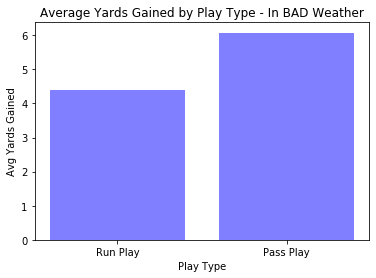

In [11]:
#Create a chart detailing the average yards gained by play type for overall sample size

avg_yards = [run_avg, pass_avg]
x_axis = np.arange(len(avg_yards))

fig1 = plt.figure()

plt.bar(x_axis, avg_yards, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play", "Pass Play"])

plt.title("Average Yards Gained by Play Type - In BAD Weather")
plt.xlabel("Play Type")
plt.ylabel("Avg Yards Gained")

fig1.savefig("../results/AvgYardsGained-Bad-Weather.png")

In [12]:
#Calculate the turnovers by play type

fumbles = run_play["fumble_lost"].sum()

interceptions = pass_play["interception"].sum()

print(f'Run play fumbles total:', fumbles, 'Pass play interceptions:', interceptions)


Run play fumbles total: 180.0 Pass play interceptions: 654.0


In [13]:
# % of run plays resulting in fumble and % of pass plays resulting in int

fumble_pct = fumbles / run_play["play_id"].count()
print(f'% of Run plays resulting in fumble: {fumble_pct}')

% of Run plays resulting in fumble: 0.009538950715421303


In [14]:
# % of pass plays resulting in int

int_pct = interceptions / pass_play["play_id"].count()
print(f'% of Pass plays resulting in interception: {int_pct}')

% of Pass plays resulting in interception: 0.025218833146955617


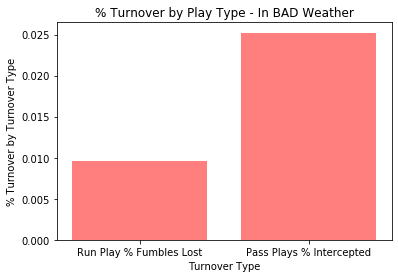

In [15]:
# Construct simple chart for turnovers

Turnovers = [fumble_pct, int_pct]
x_axis = np.arange(len(Turnovers))

fig2 = plt.figure()

plt.bar(x_axis, Turnovers, color='r', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play % Fumbles Lost", "Pass Plays % Intercepted"])

plt.title("% Turnover by Play Type - In BAD Weather")
plt.xlabel("Turnover Type")
plt.ylabel("% Turnover by Turnover Type")
fig2.savefig("../results/PctTurnover-BAD-Weather.png")

In [27]:
# Sack vs Tackle for Loss Analysis (play count)

sacks = pass_play["sack"].sum()
tackled_for_loss = run_play["tackled_for_loss"].sum()

print(f'Tackled for Loss - Run:', tackled_for_loss, '; Sacks Taken - Pass', sacks)

Tackled for Loss - Run: 1778.0 ; Sacks Taken - Pass 1596.0


In [28]:
# Sack vs Tackle for Loss Analysis (yardage)

sack_plays = pass_play.loc[pass_play["sack"] == 1, :]
avg_loss_sack = sack_plays["yards_gained"].mean()


tfl_plays = run_play.loc[run_play["tackled_for_loss"] == 1, :]
avg_loss_tfl = tfl_plays["yards_gained"].mean()

print(f'Avg loss when TFL - Run:', avg_loss_tfl, '; Avg loss when sacked - Pass', avg_loss_sack)


Avg loss when TFL - Run: -2.300337457817773 ; Avg loss when sacked - Pass -6.504385964912281


In [29]:
# Safety Analysis 

safety_run = run_play.loc[run_play["safety"] == 1, :]
safety_pass = pass_play.loc[pass_play["safety"] == 1, :]

safety_count_run = safety_run["play_id"].count()
safety_count_pass = safety_pass["play_id"].count()

print(f'Safeties via Run:', safety_count_run, '; Safeties via Pass', safety_count_pass)

Safeties via Run: 11 ; Safeties via Pass 7


In [30]:
# Annual Average Yards gained by run play
annual_run_yd = run_play.groupby("game_year")["yards_gained"].mean()
annual_run_yd

game_year
2009    4.581015
2010    4.308216
2011    4.050796
2012    4.484022
2013    4.451032
2014    4.357024
2015    4.296432
2016    4.293633
2017    4.274175
2018    4.735099
Name: yards_gained, dtype: float64

In [31]:
# Annual Average Yards gained by pass play
annual_pass_yd = pass_play.groupby("game_year")["yards_gained"].mean()
annual_pass_yd

game_year
2009    6.079948
2010    5.585307
2011    5.806877
2012    6.273986
2013    5.870581
2014    6.320988
2015    6.303533
2016    6.187570
2017    6.350565
2018    5.897805
Name: yards_gained, dtype: float64